Step 10: Burgers' Equation in 2D
----
***
Remember, Burgers' equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've already done it before!

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D

In [27]:
# variable declarations
nx = 41
ny = 41
nt = 12
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nu = 0.01
sigma = 0.2
dt = sigma * dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
v = np.ones((nx,ny))
un = np.ones((nx,ny))
vn = np.ones((nx,ny))

# initial conditions

u[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2
v[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2

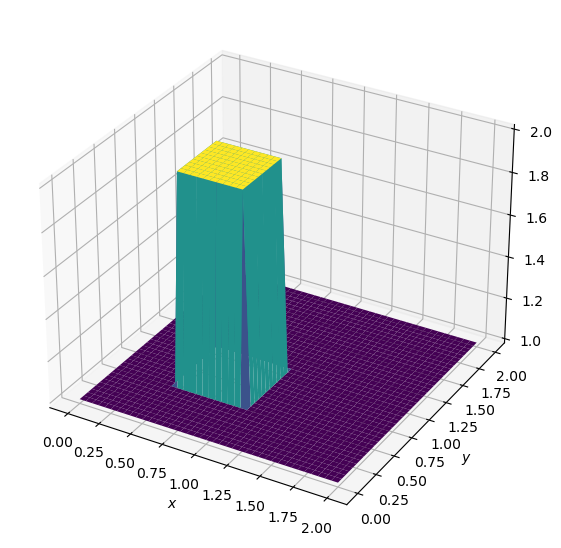

In [28]:
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [29]:
for n in range(nt): ##loop across number of time steps
    
    un = u.copy()
    vn = v.copy()

    u[1:-1,1:-1] = (u[1:-1,1:-1] - 
                    dt / dx * u[1:-1,1:-1] * (u[1:-1,1:-1] - u[0:-2,1:-1]) -
                    dt / dy * v[1:-1,1:-1] * (u[1:-1,1:-1] - u[1:-1,0:-2]) +
                   nu * dt / dx**2 * (u[2:,1:-1] - 2 * u[1:-1,1:-1] + u[:-2,1:-1]) +
                   nu * dt / dy**2 * (u[1:-1,2:] - 2 * u[1:-1,1:-1] + u[1:-1,:-2]))
    v[1:-1,1:-1] = (v[1:-1,1:-1] - 
                    dt / dx * u[1:-1,1:-1] * (v[1:-1,1:-1] - v[0:-2,1:-1]) -
                    dt / dy * v[1:-1,1:-1] * (v[1:-1,1:-1] - v[1:-1,0:-2]) +
                   nu * dt / dx**2 * (v[2:,1:-1] - 2 * v[1:-1,1:-1] + v[:-2,1:-1]) +
                   nu * dt / dy**2 * (v[1:-1,2:] - 2 * v[1:-1,1:-1] + v[1:-1,:-2]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1    

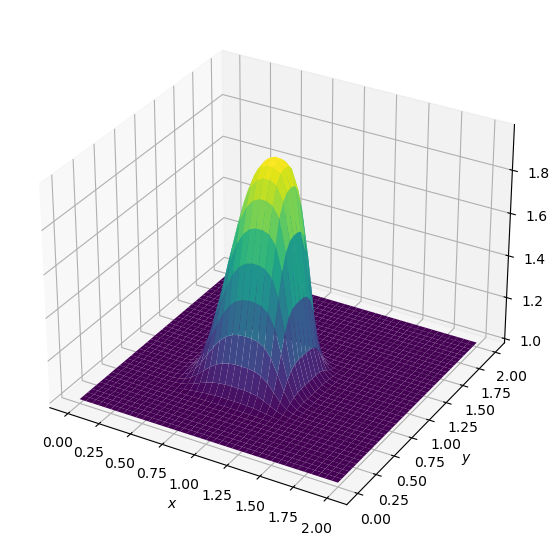

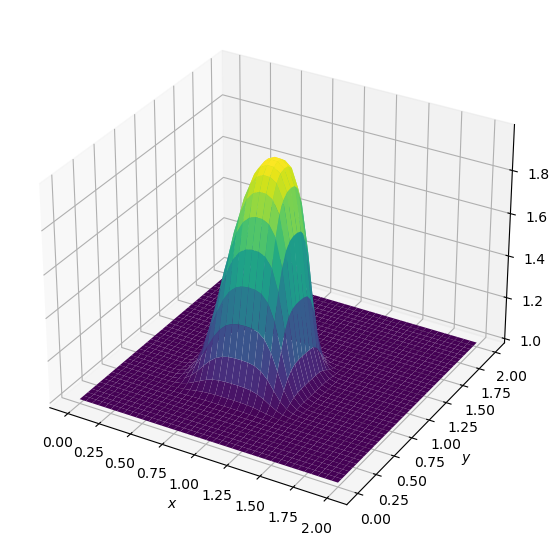

In [30]:
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,v,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');